In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(layer_input, network_input_size, network_output_size,
              activation_function=None):
    weights = tf.Variable(tf.random_normal([network_input_size, network_output_size]))
    # define some start value for the bias
    biases = tf.Variable(tf.zeros([1, network_output_size]) + 0.5)
    layer_output = tf.matmul(layer_input, weights) + biases
    if activation_function:
        return activation_function(layer_output)
    return layer_output

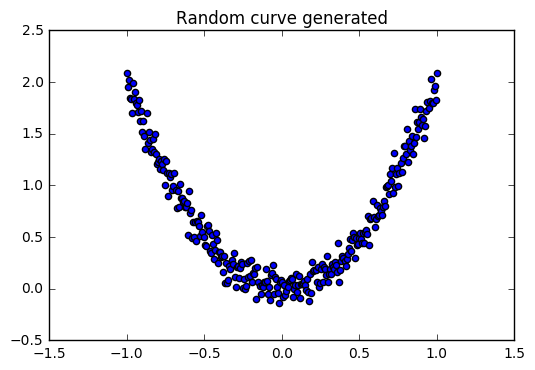

In [2]:
%matplotlib inline
num_rows = 300
X = np.linspace(-1, 1, num_rows).reshape(num_rows, 1)
Y = 2 * np.square(X) + 2 * np.random.normal(0, 0.05, num_rows).reshape(num_rows, 1)
plt.scatter(X, Y)
plt.title('Random curve generated')
plt.show()

In [3]:
# now generate placeholders for giving inputs to the network
# the float 32 is defined to avoid compatibility issues if any exist
# we add the 'None' in the placeholder so that while our network trains, it can accept 
# input of any size
# inputs given below are the same as the one we defined earlier
X_input = tf.placeholder(tf.float32, [None, 1])
Y_input = tf.placeholder(tf.float32, [None, 1])
learning_rate = 0.01
# now we add the first and only hidden layer
# we pass the size of the input to be 1, because, we are considering the whole input
# vector as one single point (so as to speak)
# we also, pass an output size of size 10 because we want to generate 10 outputs (neurons)
hidden_layer_1 = add_layer(X_input, 1, 10, tf.nn.relu)
# now we want to reduce the 10 input vectors (100*10) into one output / predicted vector
# we pass an activation function of None
output_layer_pred = add_layer(hidden_layer_1, 10, 1, None)
loss = tf.reduce_mean(tf.square(Y_input - output_layer_pred), 0)[0]
train_func = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Using matplotlib backend: Qt5Agg


InternalError: Blas SGEMM launch failed : a.shape=(300, 1), b.shape=(1, 10), m=300, n=10, k=1
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_0/_7, Variable/read)]]

Caused by op 'MatMul', defined at:
  File "C:\Users\balac\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\balac\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\balac\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\balac\Anaconda3\lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "C:\Users\balac\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\balac\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\balac\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\balac\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\balac\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\balac\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\balac\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\balac\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\balac\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\balac\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\balac\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\balac\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\balac\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\balac\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\balac\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\balac\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-b8036f2f02eb>", line 13, in <module>
    hidden_layer_1 = add_layer(X_input, 1, 10, tf.nn.relu)
  File "<ipython-input-1-c0b3feaf00fc>", line 10, in add_layer
    layer_output = tf.matmul(layer_input, weights) + biases
  File "C:\Users\balac\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1765, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\balac\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1454, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "C:\Users\balac\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "C:\Users\balac\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\balac\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(300, 1), b.shape=(1, 10), m=300, n=10, k=1
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_0/_7, Variable/read)]]


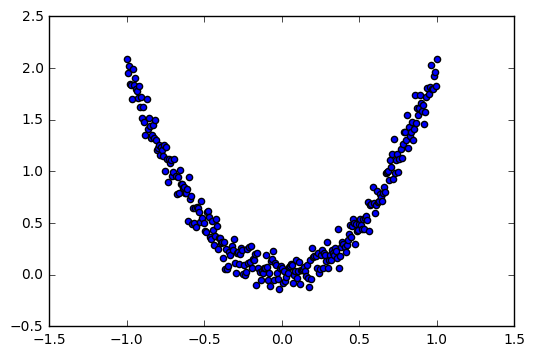

In [4]:
%matplotlib
iterations = 10000
pause_interval = 0.5
# for iteration in range(iterations):
with tf.Session() as session:
    init = tf.global_variables_initializer()
    session.run(init)
    fig = plt.figure()
    # plot for the prediction function
    axes0 = fig.add_subplot('111')
    axes0.scatter(X, Y)
    plt.ion()
    plt.show()
    
    for iteration in range(iterations):
        session.run(train_func, feed_dict={X_input: X, Y_input: Y})
        # prediction plot
        if iteration % 50 == 0:
            try:
                axes0.lines.remove(lines[0])
            except Exception:
                pass
            Y_predicted = session.run(output_layer_pred, feed_dict={X_input: X})
            plt.title('Iteration Number : ' + str(iteration))
            lines = axes0.plot(X, Y_predicted, c='r', lw=5)
            plt.pause(pause_interval)